# Лабораторная работа №1
Выполняли:


1.   Алексеев Михаил Николаевич
2.   Гурьянов Марк Владимирович
3.   Ермаков Михаил Константинович
4.   Карандашева Надежда Алексеевна
5.   Юсупова Эдна Эдуардовна



In [ ]:
print("Downloading data ... ")
link = "https://www.dropbox.com/s/folmywvy3tccwlh/data.csv?dl=0"
!wget $link -O /content/data.csv

--2022-04-15 08:13:03--  https://www.dropbox.com/s/folmywvy3tccwlh/data.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/folmywvy3tccwlh/data.csv [following]
--2022-04-15 08:13:03--  https://www.dropbox.com/s/raw/folmywvy3tccwlh/data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc421f794bd6104821631b07bcdb.dl.dropboxusercontent.com/cd/0/inline/Bjba5K2FLqjJjzUQVzqog9WX0-M6j06UmOKRNlY2rE9x2Xf9WB82XFjtbsJv7P3B2BidUNUF9dxRb0dUfp_o7zBqIXlDZ995MJmE5vP9_KUI64N1-l9Ptn3Kct7GE3d3Hyq7RmUKTw2su-4GZFM1kyojzwmKvT72jHXEa3TIyaE_Ow/file# [following]
--2022-04-15 08:13:04--  https://uc421f794bd6104821631b07bcdb.dl.dropboxusercontent.com/cd/0/inline/Bjba5K2FLqjJjzUQVzqog9WX0-M6j06UmOKRNlY2rE9x2Xf9WB82XFjtbsJv7P3B2BidUNUF9dx

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
import scipy as sp
from scipy.signal import find_peaks
from matplotlib.patches import Ellipse
from statistics import mean

In [ ]:
data = pd.read_csv('data.csv', sep=',')
data=data[:20000]
data

,ECGt,ECGs,FPGt,FPGs
0,15.001125,2.196079,15.001125,3.372549
1,15.005270,1.843137,15.005270,3.372549
2,15.009391,1.274510,15.009391,3.352941
3,15.009391,0.745098,15.009391,3.352941
4,15.013700,0.254902,15.013700,3.333333
...,...,...,...,...
19995,77.405075,3.000000,77.405075,0.215686
19996,77.409172,2.784314,77.409172,0.254902
19997,77.409172,2.843137,77.409172,0.274510
19998,77.413300,2.764706,77.413300,0.294118


# Графики исходных данных

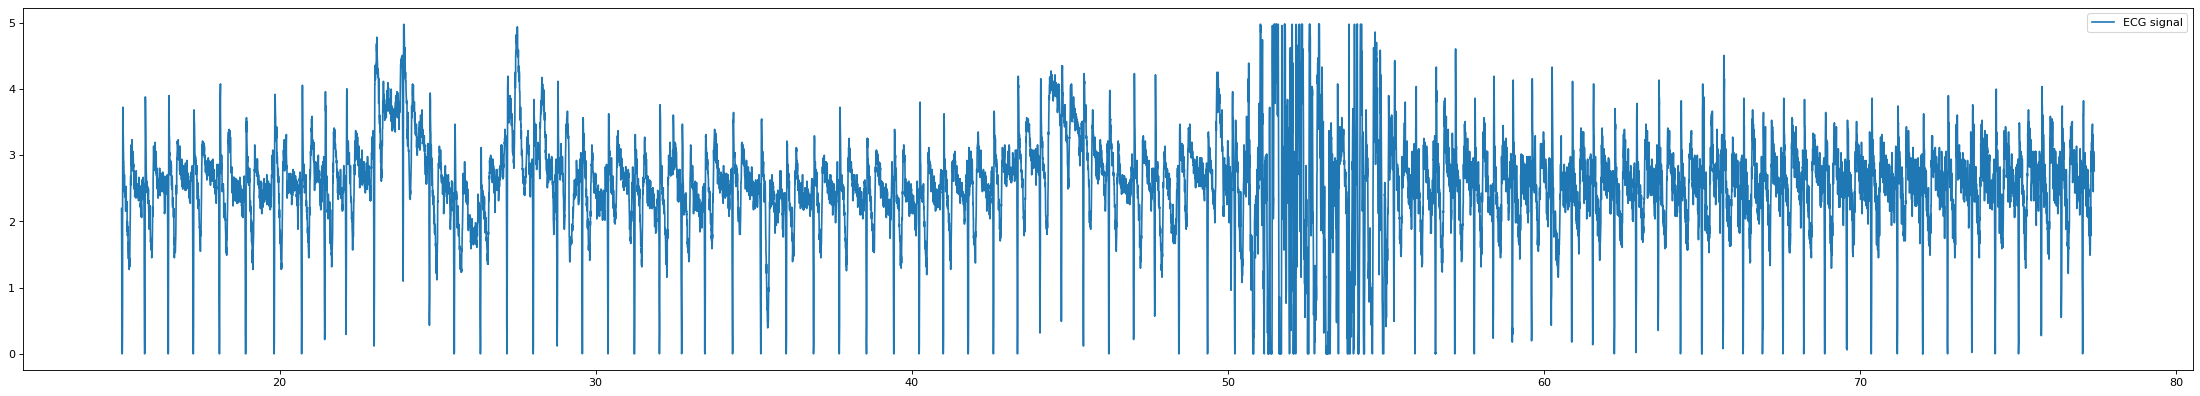

In [ ]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(data['ECGt'],data['ECGs'])
plt.legend(['ECG signal'])
plt.show()

In [ ]:
data['FPGt'] -= data['FPGt'].min()
data['FPGs'].max()

5.0

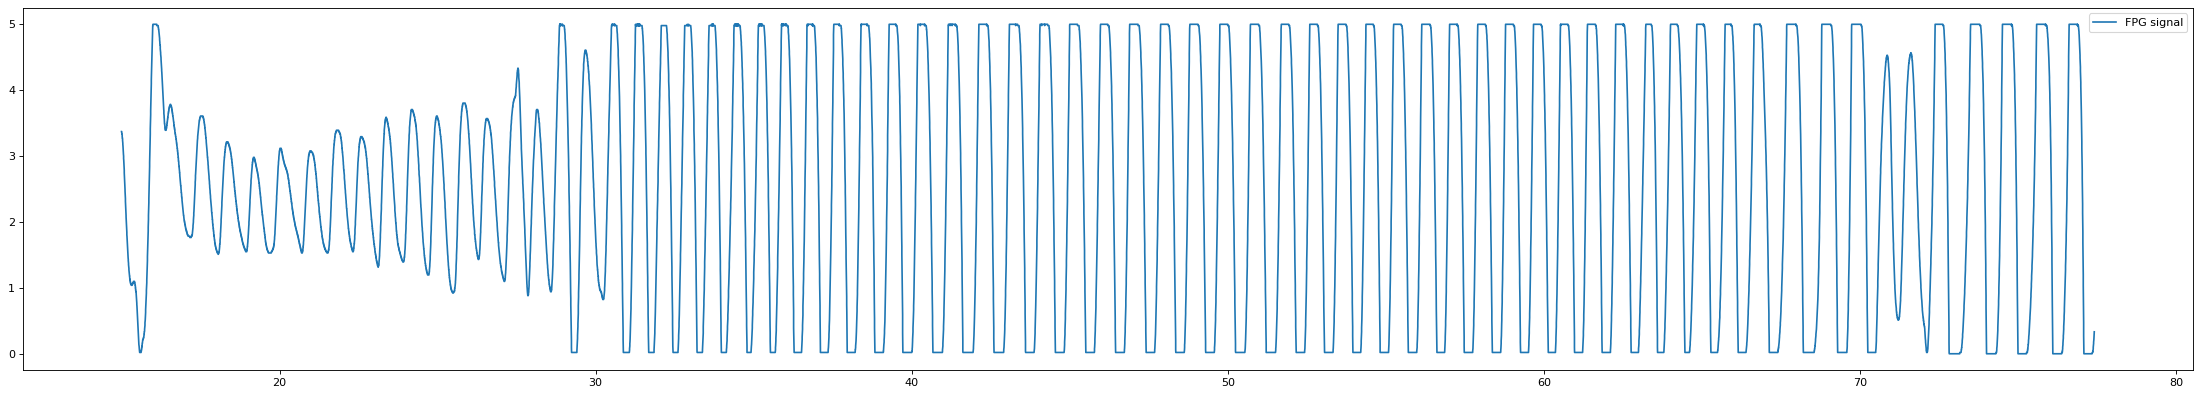

In [ ]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(data['FPGt'], data['FPGs'])
plt.legend(['FPG signal'])
plt.show()

# График с пиками

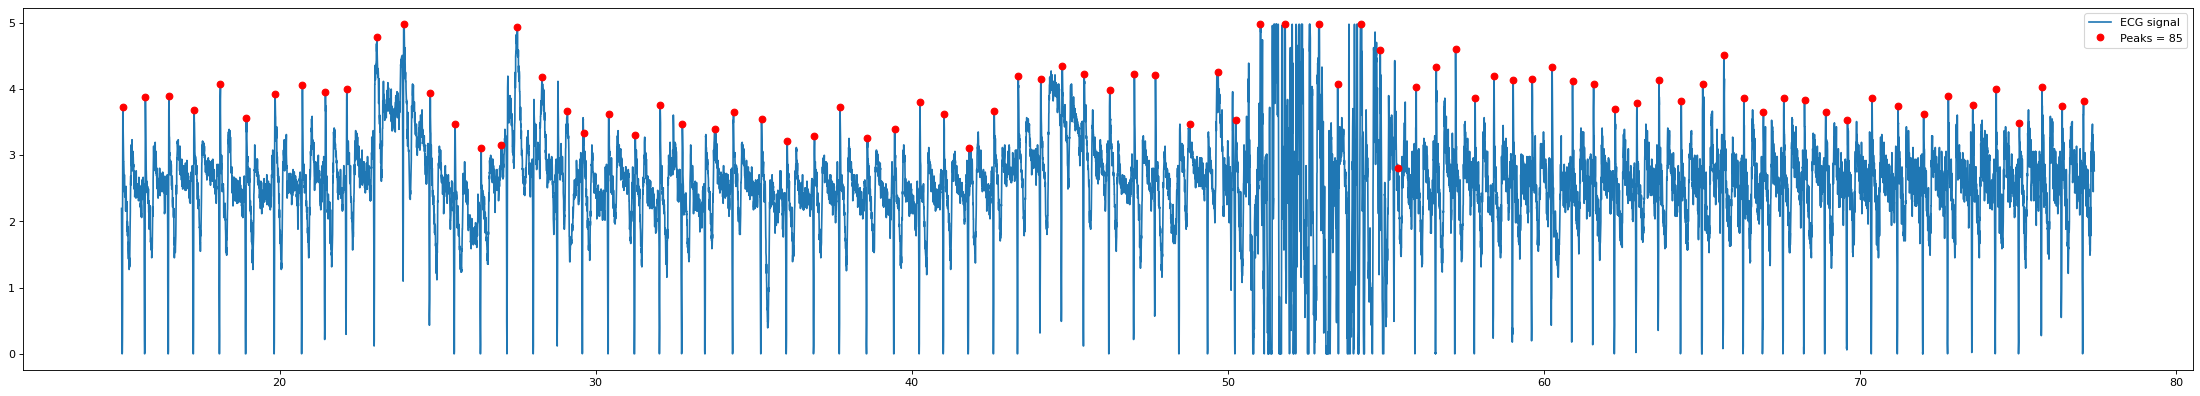

In [ ]:
(peaksECG, _) = find_peaks(data['ECGs'], distance=170)
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(data['ECGt'], data['ECGs'])
plt.plot(data['ECGt'][peaksECG], data['ECGs'][peaksECG], 'ro')
plt.legend(['ECG signal', 'Peaks = ' + str(len(data['ECGt'
           ][peaksECG]))])
plt.show()

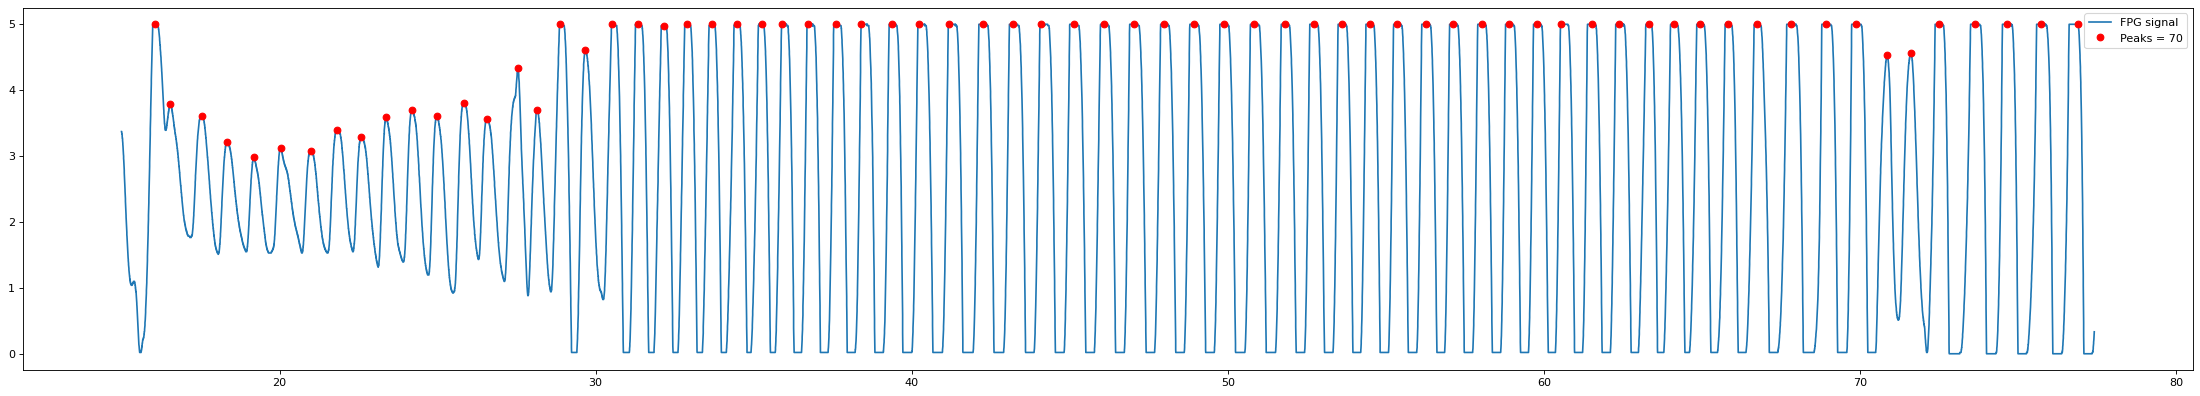

In [ ]:
(peaksFPG, _) = find_peaks(data['FPGs'], height=2.68, distance=160)
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(data['FPGt'], data['FPGs'])
plt.plot(data['FPGt'][peaksFPG], data['FPGs'][peaksFPG], 'ro')
plt.legend(['FPG signal', 'Peaks = ' + str(len(data['FPGt'
           ][peaksFPG]))])
plt.show()

# Выполним интерполяцию

In [ ]:
t=data['ECGt'].to_list()
indexes=[0]+[i for i in range(1,len(t)) if t[i] > t[i-1]]
t=[t[i] for i in indexes]
s=[data['ECGs'][i] for i in indexes]

time = np.linspace(min(t), max(t), len(t))
ecg = sp.interpolate.interp1d(t, s, kind='cubic')(time)
(peaksECG_inter, _) = find_peaks(ecg , height = 3, distance = 40)

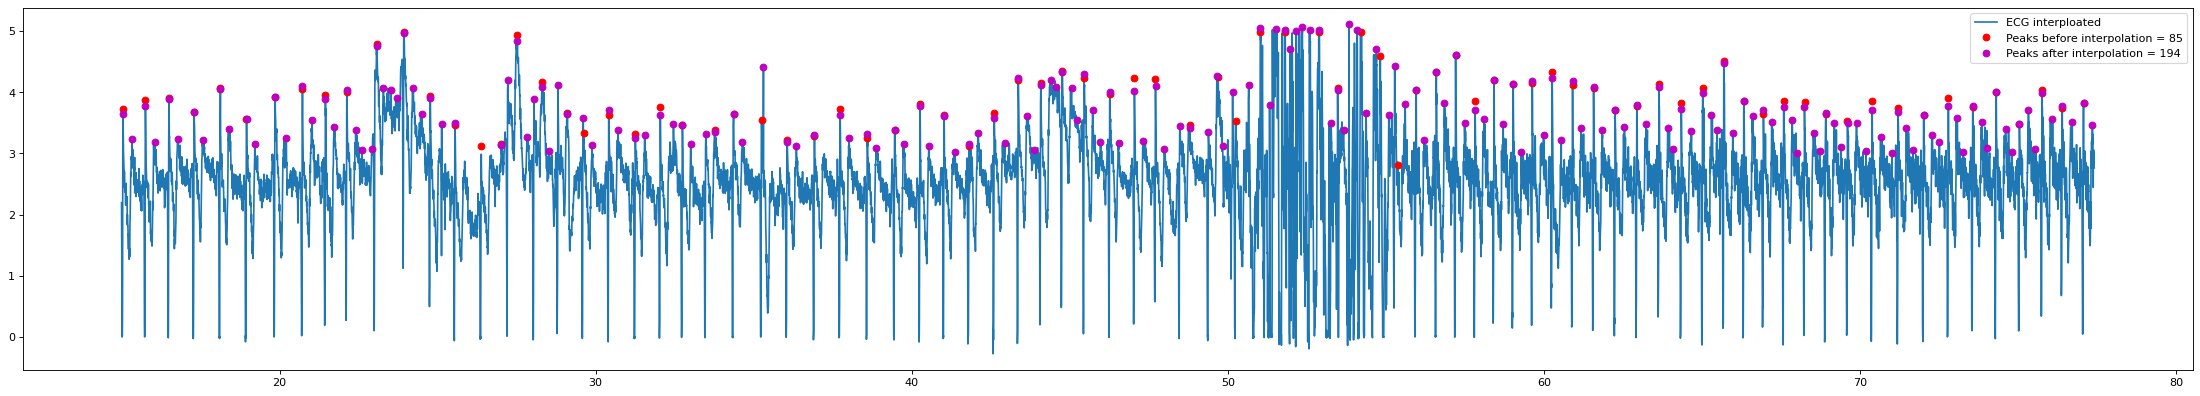

In [ ]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(time, ecg)
plt.plot(data['ECGt'][peaksECG], data['ECGs'][peaksECG], 'ro')
plt.plot(time[peaksECG_inter], ecg[peaksECG_inter], 'mo')
plt.legend(['ECG interploated', 'Peaks before interpolation = '
           + str(len(data['ECGt'][peaksECG])),
           'Peaks after interpolation = '
           + str(len(ecg[peaksECG_inter]))])
plt.show()

In [ ]:
t = data['FPGt'].to_list()
indexes = [0] + [i for i in range(1, len(t)) if t[i] > t[i - 1]]
t = [t[i] for i in indexes]
s = [data['FPGs'][i] for i in indexes]

fpg = sp.interpolate.interp1d(t, s, kind='cubic')(time)
(peaksFPG_inter, _) = find_peaks(fpg, height=2.68, distance=37)

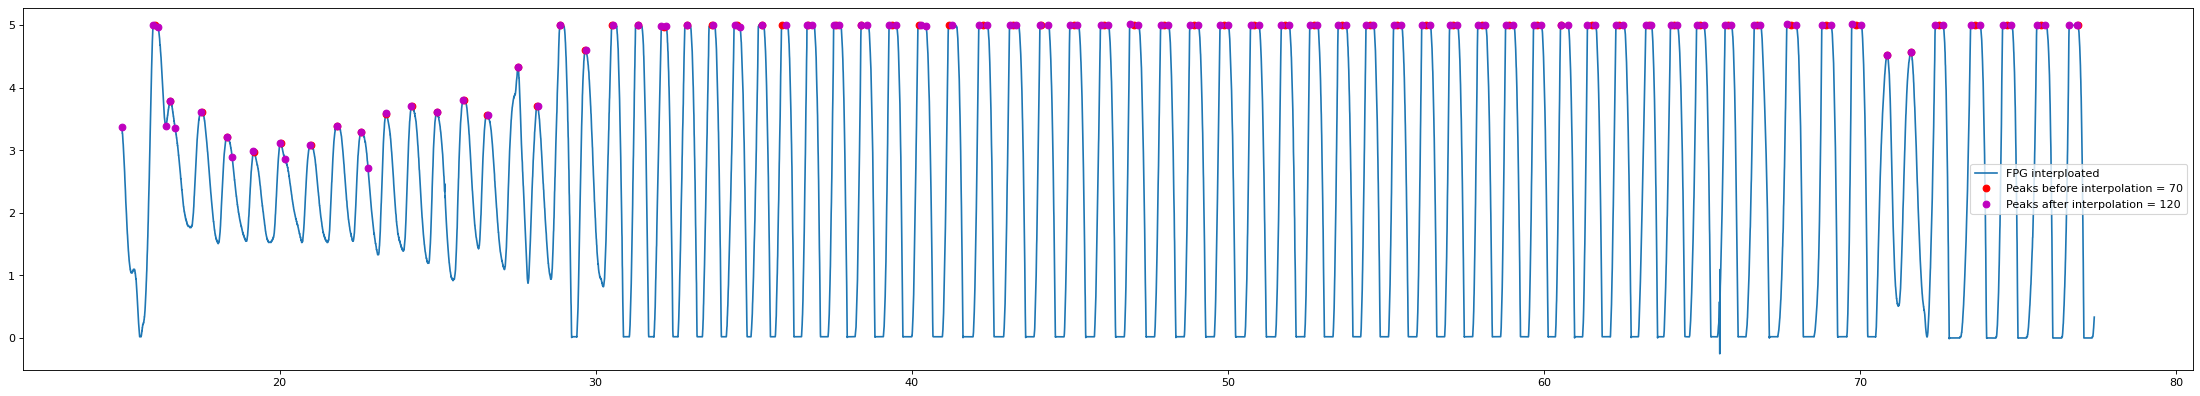

In [ ]:
plt.figure(figsize=(35, 6), dpi=80)
plt.plot(time, fpg)
plt.plot(data['FPGt'][peaksFPG], data['FPGs'][peaksFPG], 'ro')
plt.plot(time[peaksFPG_inter], fpg[peaksFPG_inter], 'mo')
plt.legend(['FPG interploated', 'Peaks before interpolation = '
           + str(len(data['FPGt'][peaksFPG])),
           'Peaks after interpolation = '
           + str(len(fpg[peaksFPG_inter]))])
plt.show()

# Нижние инервалы между соседними пиками

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


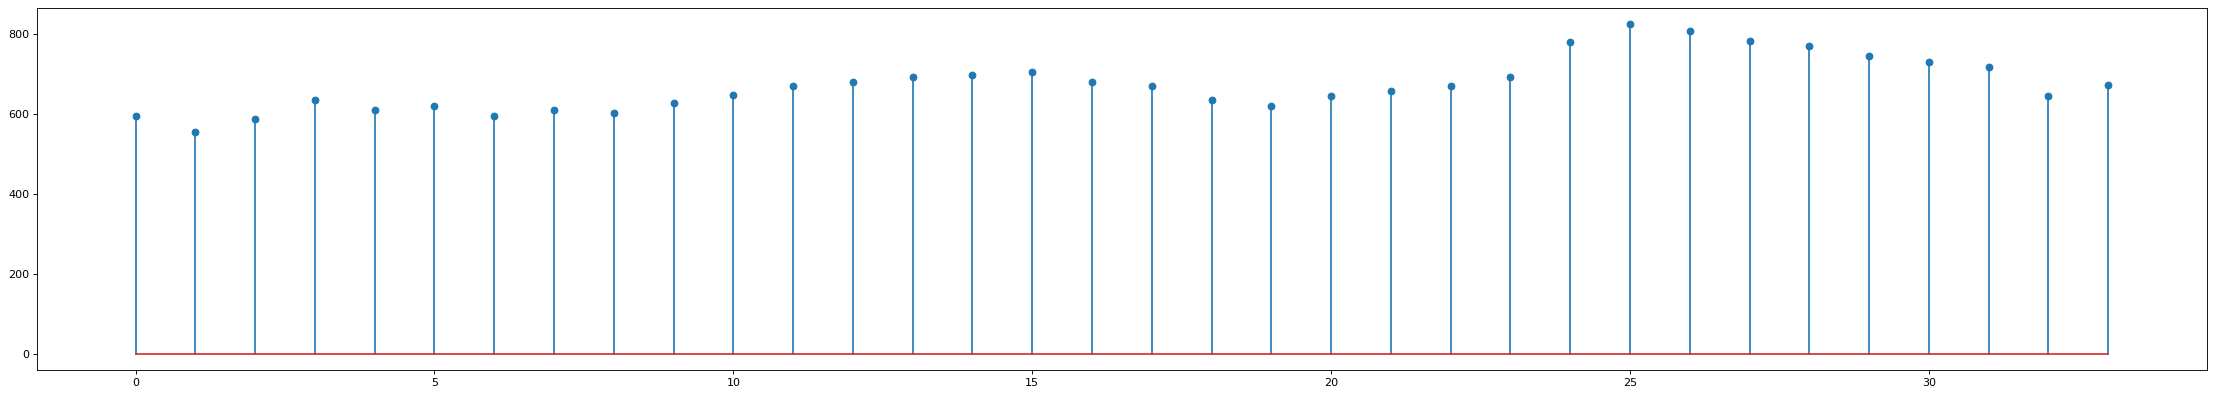

In [ ]:
rr = [round(1000 * (data['ECGt'][peaksECG[i + 1]] - data['ECGt'][peaksECG[i]])) 
      for i in range(len(peaksECG) - 1)]
rr = rr[50:]
N = len(rr)
plt.figure(figsize=(35, 6), dpi=80)
plt.stem(rr)
plt.show()

# По заданному массиву кардиоинтервалов рассчитаем основные параметры вариабельности: 
* среднее значение $ M = \frac{\sum_{i=1}^n X_i}{n} $
* среднеквадратическое отклонение $SDNN = \sqrt{\frac{\sum{i=1}^n (M - X_i)^2}{n}} $,  
* коэффициент вариации $CV = \frac{SDNN}{M}*100\%$.
#### По полученному графику определить амплитуду моды АMо, которая соответствует максимальному значению, и моду Mо – значение аргумента в точке максимума.


* АМо = $\frac{23}{71} \cdot 100\% = 32.3944\%$
* Мода лежит в интервале 600-650. Можно заметить, что среднее значение (равное 630) лежит в Интервале мод. Так как мы строили гистограмму, то для значения возьму среднее $Mo = \frac{600 + 650 }{2} = 625\text{мс} = 0.625$ с


#### Определить вариационный размах MxDMn.

* $MxDMn = 735 - 488 = 247 \text{мс} = 0.247$ с

# Рассчитать индекс напряжения регуляторных систем ИН.
* $\text{SI} = \frac{AMo \cdot 100\%}{2\cdot Mo \cdot MxDMn} = \frac{0.323944 \cdot 100\%}{2\cdot 0.625 \cdot 0.247} = 104.9  \text{ у.е.}$
    
 

In [ ]:
eps = 25
rr25 = [sum([rr.count(i + j) for j in range(-eps, eps + 1)]) for i in
        range(min(rr), max(rr))]

g = {'Mo': min(rr) + max(range(len(rr25)), key=rr25.__getitem__),
     'Mx': max(rr), 'Mn': min(rr)}
g['AMo'] = sum([rr.count(g['Mo'] + j) for j in range(-eps, eps + 1)]) / N
g['MxDMn'] = g['Mx'] - g['Mn']
g['SI'] = g['AMo'] * 10 ** 8 / (2 * g['Mo'] * g['MxDMn'])

In [ ]:
p = {'HR': 60 * 1000 * N / sum(rr), 'M': sum(rr) / N}
p['SDNN'] = (sum([(i - p['M']) ** 2 for i in rr]) / (N - 1)) ** 0.5
p['CV'] = p['SDNN'] / p['M'] * 100
p['RMSSD'] = (sum([(rr[i] - rr[i + 1]) ** 2 for i in range(N - 1)]) / (N - 1)) ** 0.5
p['pNN50'] = sum([(1 if abs(rr[i] - rr[i + 1]) > 50 else 0) 
              for i in range(N - 1)]) / (N - 1)

In [ ]:
tables = pd.read_html("https://edu-biz.org/2014/03/31/variabelnost-serdechnogo-ritma/", header=0)
result = tables[0].drop(tables[0].columns[[3, 4, 5, 6, 7]], axis=1)
result = result.drop([0, 1, 4, 8, 10], axis=0)
add_arg = pd.DataFrame({
    "Параметр":['HR', 'pNN50', 'Mo', 'Mx', 'Mn', 'MxDMn'], 
    "Норма":['60-80', '7±2%', '-', '0.8±0.4', '-', '-'], 
    "У пациента":[p['HR'], p['pNN50'] * 100, g['Mo'], g['Mx'], g['Mn'], g['MxDMn']]
    })
result = pd.concat([result, add_arg], ignore_index=True)
result['У пациента'][0] = min(rr)
result['У пациента'][1] = max(rr)
result['У пациента'][2] = p['SDNN']
result['У пациента'][3] = p['RMSSD']
result['У пациента'][4] = p['CV']
result['У пациента'][5] = g['AMo'] * 100
result['У пациента'][6] = g['SI']
result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Параметр,Норма,У пациента
0,R-R min (мс),700,553.000000
1,R-R max (мc),900,823.000000
2,SDNN (мc),110±35,66.718206
3,RMSSD (мc),64±6,30.221405
4,CV (%),5-7,9.930043
5,Амо (%),30-50,35.294118
6,ИН,30-200,105.759672
7,HR,60-80,89.301348
8,pNN50,7±2%,6.060606
9,Mo,-,618.000000


# По заданному массиву кардиоинтервалов построить гистограмму с шагом 50 мс (0.05 с)

Гистограмма - ассиметрична т.к. в порцессе снятия данных были 
нарушения в стационарности испытуемого =)


Text(0.5, 0, 'RR-интервал, мс')

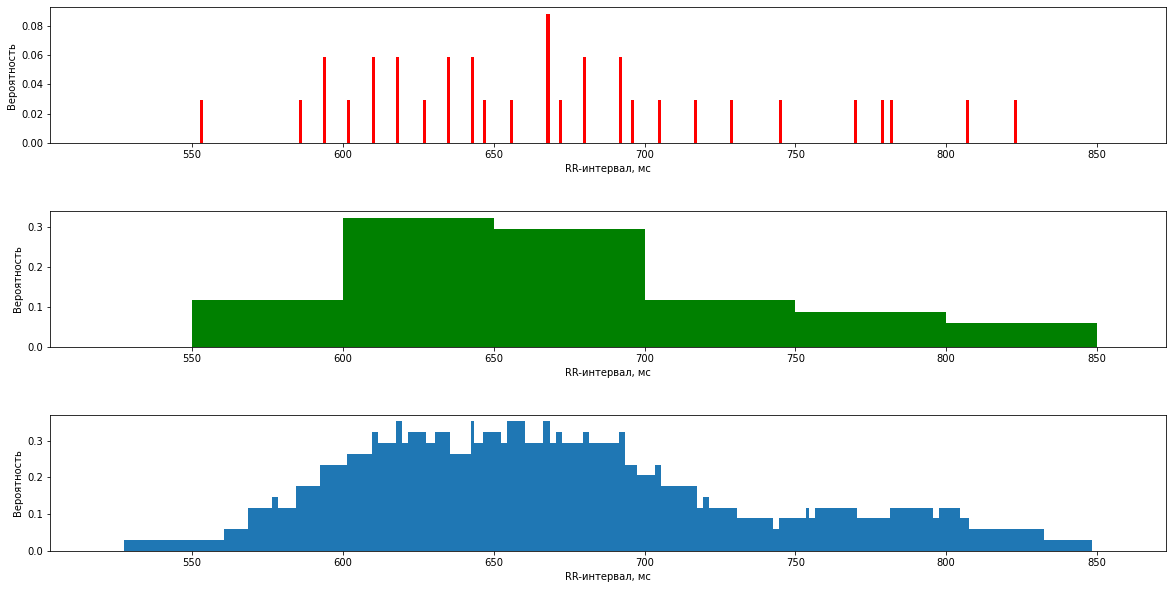

In [ ]:
print('Гистограмма - ассиметрична т.к. в порцессе снятия данных были \nнарушения в стационарности испытуемого =)')
x = list(set(rr))
x.sort()
xmin = g['Mn'] - 50
xmax = g['Mx'] + 50
eps = 25
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3, 1, 1)
y = [rr.count(i) / N for i in x]
plt.bar(x, y, width=1, color='r')
plt.xlim(xmin, xmax)
plt.ylabel('Вероятность')
plt.xlabel('RR-интервал, мс')

plt.subplot(3, 1, 2)
x = range(425, 1325, 2 * eps)
y = [sum([rr.count(i + j) for j in range(-eps, eps + 1)]) / N for i in x]
plt.bar(x, y, width=2 * eps, color='g')
plt.xlim(xmin, xmax)
plt.ylabel('Вероятность')
plt.xlabel('RR-интервал, мс')

plt.subplot(3, 1, 3)
x = range(xmin, xmax)
y = [sum([rr.count(i + j) for j in range(-eps, eps + 1)]) / N for i in x]
plt.bar(x, y, width=1)
plt.xlim(xmin, xmax)
plt.ylabel('Вероятность')
plt.xlabel('RR-интервал, мс')

# По заданному массиву кардиоинтервалов построим корреляционную ритмограмму

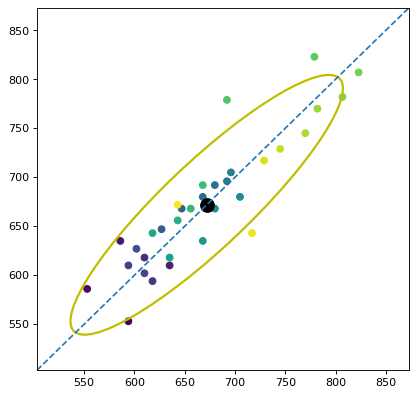

In [ ]:
cov = np.cov(rr[:-1], rr[1:])
(lambda_, v) = np.linalg.eig(cov)
lambda_ = np.sqrt(lambda_)
dev_size = 2

plt.figure(figsize=(6, 6), dpi=80)
plt.plot([xmin, xmax], [xmin, xmax], '--')
plt.scatter(rr[:-1], rr[1:], c=range(N - 1))
plt.gca().add_patch(Ellipse(
    xy=(p['M'], p['M']),
    width=lambda_[0] * 2 * dev_size,
    height=lambda_[1] * 2 * dev_size,
    angle=np.rad2deg(np.arccos(v[0, 0])),
    edgecolor='y',
    fc='None',
    lw=2,
    ))

plt.scatter(p['M'], p['M'], c='k', s=150, marker='o')
plt.xlim(xmin, xmax)
plt.ylim(xmin, xmax)
plt.show()

# Рассчитаем значение коэффициента корреляции после первого сдвига СС1 и число сдвигов до первого нулевого значения коэффициента корреляции СС0

In [ ]:
r = [np.corrcoef(rr[:N - i], rr[i:])[0][1] for i in range(N)]
eps = 0.1
zeroes = [i for i in range(N) if abs(r[i]) < eps]
neg = [i for i in range(N) if r[i] <= 0]

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
CC={'СС1':r[1], 'CC0':neg[0]}
CC

{'CC0': 19, 'СС1': 0.8960317587997306}

# По заданному массиву кардиоинтервалов построим график автокоррелограммы

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0.5, 0, 'Сдвиг времени, с')

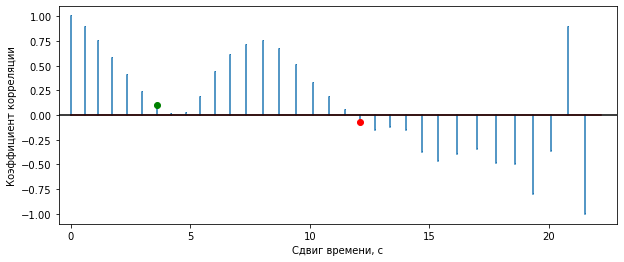

In [ ]:
plt.figure(figsize=(10, 4))
plt.stem([sum(rr[:i]) / 1000 for i in range(N)], r, markerfmt=',')
plt.plot([-0.5, 300], [0, 0], color='black')
plt.plot(sum(rr[:zeroes[0]]) / 1000, r[zeroes[0]], 'go')
plt.plot(sum(rr[:neg[0]]) / 1000, r[neg[0]], 'ro')
plt.xlim(-0.5, sum(rr) / 1000)
plt.ylabel('Коэффициент корреляции')
plt.xlabel('Сдвиг времени, с')